In [1]:
#import required packages
import numpy as np
from numpy import exp
from numpy import std
from numpy import mean
from numpy import sqrt
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

sns.set(color_codes=True)

In [2]:
#read the dataset from CSV file to DataFrame
insurance = pd.read_csv('insurance.csv')

In [3]:
#check the data load
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#check for null values, datatypes , total sample size
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Totally 1338 records are present . 7 variables for each record

no null values which means no missing data. 

continous variables - age,bmi,children,charges
categorical variables - sex,smoker,region


# Univariate Analysis of Continous Variables

In [5]:
#5 point summary for continous variables
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


For Age , the range is between 18 to 64. we can assume that the insurance is only for adults and the people with ages below that may come under child.

Also interesting to note that the data is not available for age above 64 which means one of the two things - either the data is not available for old people or that insurance policy does not allow people above certain age.

BMI goes upto 53 which is very high value (it would be interesting to study the characters of records with higher BMI)

Children is upto 5 but the mean and median are around 1 . so half of the insurance holders have 1 or no children to support to.

For Charges , the standard deviation looks very high.Especially the difference the 75th pecentile and the max value looks huge.

The Inter-quartile range for the charge is around 15,000 . but there are people who get the insurance above 63000 .


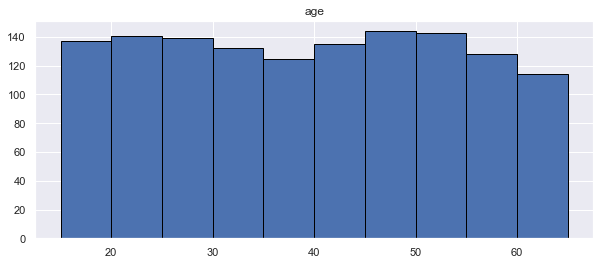

In [6]:
# distribution for age
insurance.hist(column = ['age'], edgecolor = 'black',bins =np.arange(15,70,5) , figsize=(10,4))
plt.show()

The age column is uniformly distributed.There is no skewness.There are no outliers.

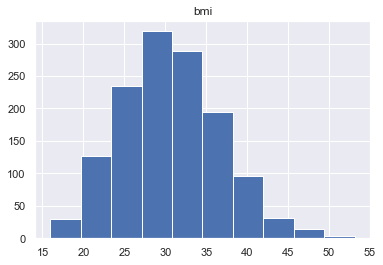

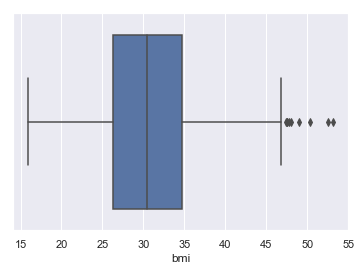

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [7]:
# distribution for BMI
insurance.hist(column = ['bmi'])
plt.show()
sns.boxplot(insurance['bmi']) # to check the presence of outliers
plt.show()
insurance[insurance['bmi']>50] # curious to know about the people with very high BMI

The BMI column is normally distributed.Not much skewness is observed.

There are  large number of outliers on the right side which means there are many Class C obese people in the data set.

If we observe the BMI above 50 ,surprisingly we see people of the age 18 to 23 . Even young people are found to be obese.

One more interesting column to observe , the charge for the persons with BMI 50.38 , 53.13 is very less.Suppose we find a positive correlation with BMI and Charges and design a model with it , these observations may become type 1 error.

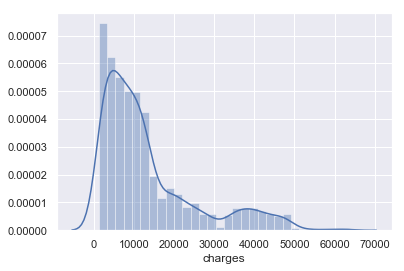

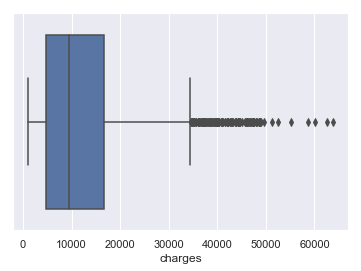

In [8]:
# distribution for charges
sns.distplot(insurance['charges'])
plt.show()
sns.boxplot(insurance['charges'])  # to check the presence of outliers
plt.show()

The charges column is normally distributed with a high degree of positive(right-side) skewness.
This implies that data has to be lograthamically transformed before performing any test.

The modal value is below 10,000 .

Due to the positive skewness , even with the high value of standard deviation (12110.011237) , there are many outliers.

Let us see how many values are above 35K.

In [9]:
print("Number of persons with charges above 35K : " )
insurance[insurance['charges']>35000].count() #count of the records with charges greater than 35K

Number of persons with charges above 35K : 


age         133
sex         133
bmi         133
children    133
smoker      133
region      133
charges     133
dtype: int64

133 records which means the 10 percent of the total data set is found to be outlier for the charges column . This would be a problem to fit the right model.



The modal value is 10,000 for charges .Let us see below the people who are spending more than 50,000 i.e. one person spending more than 5 times of an average person expenditure.

In [10]:
insurance[insurance['charges'] > 50000] #records with charges above 50K

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


On a high level observation , we can see that all the people who have higher medical expenses are found to be smokers as well as obese (BMI above 30).

we can assume that people with higher BMI and smoking habits have serious health problems causing them to spend a huge amount of money.

# Univariate Analysis of Categorical variables

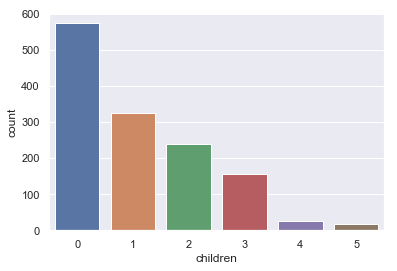

In [11]:
#distribution of children data
sns.countplot(insurance['children'])
plt.show()

More than 50 percent are said to have no children under their insurance policy.

The children data is normally distributed with high degree of positive skewness.

Let us see about the people with 5 children.

In [12]:
five_children_data = insurance[insurance['children'] > 4] # filter the records with children more than 4
five_children_data.sort_values(by=['age']) # sort the records by age

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
166,20,female,37.000,5,no,southwest,4830.63000
984,20,male,30.115,5,no,northeast,4915.05985
413,25,male,23.900,5,no,southwest,5080.09600
1245,28,male,24.300,5,no,southwest,5615.36900
71,31,male,28.500,5,no,northeast,6799.45800
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
937,39,female,24.225,5,no,northwest,8965.79575
969,39,female,34.320,5,no,southeast,8596.82780


After sorting by age , we can see that there are three records under the age of 20 is said to have 5 children 
which looks suspicious.

This may be incorrect data.

Looking at their charges , it is closer to 5000 . It can also be true that the data is correct .

We can only imagine the situations such as the insurance policy allows addition of step-children (not bonded by blood) or
the society is so backward that there are people who have 5 children at 20 , or there can be a scenario like they are adopted kids.

we can't really conclude on this outliers.

we can also technically call these as Contextual outliers - outliers for that particular age group .



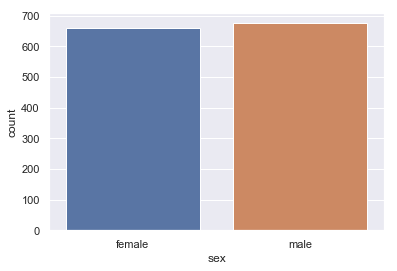

In [13]:
sns.countplot(insurance['sex']) #distribution of sex
plt.show()

We can observe that the male and female population is uniformly distributed. There are almost equal number of men and women.

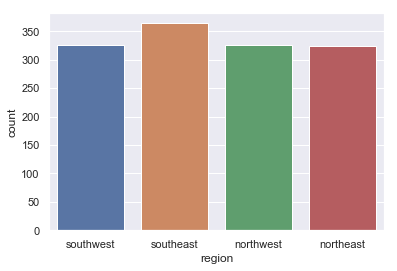

In [14]:
sns.countplot(insurance['region']) #distribution of sex
plt.show()

We can observe that the region data is uniformly distributed. There are almost equal number of insurance holder from all the regions.

we can infer that the data is sampled with same size from all the regions (around 300 records in every region). 



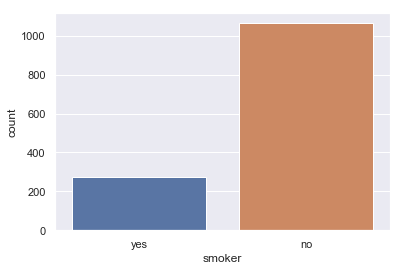

In [15]:
sns.countplot(insurance['smoker']) #distribution of smoker
plt.show()

we can see the number of smokers are very less compared to non-smokers. The ratio is approximately 1:5 which means only around 20 percent of the people smoke .


# Bivariate Analysis

In [108]:
#function to categorize age
def categorize_age(df):
    cut_points = np.arange(10,80,10)
    label_names = ["10-19","20-29","30-39","40-49","50-59","60-69"]
    df["age_categories"] = pd.cut(df["age"],
                                             cut_points,labels=label_names)
    return df

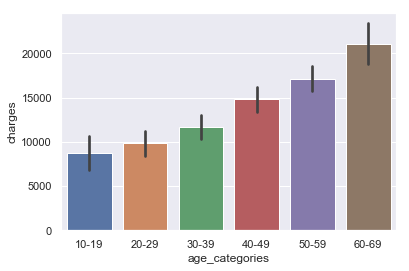

In [109]:
# compare age with charges
age_data = categorize_age(insurance)
sns.barplot(x="age_categories" , y ="charges" , data =age_data)

we can observe that the  charges for older people are greater than younger people .
Looks agreeable , with ageing , the medical costs become more.

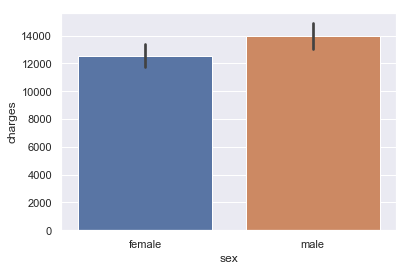

In [112]:
sns.barplot(x="sex" , y ="charges" , data =insurance) # visualize gender with charges
plt.show()

Though we have almost equal number of men and women in our data , the male population spends more in medical expenses than female

In [117]:
#function to categorize age
def categorize_bmi(df):
    cut_points = [9,18.5 ,24.9,29.9,34.9 ,39.9,100]
    label_names = ["Underweight","Normal","pre-obese","obese-class1","obese-class2","obese-class3"]
    df["bmi_categories"] = pd.cut(df["bmi"],
                                             cut_points,labels=label_names)
    return df

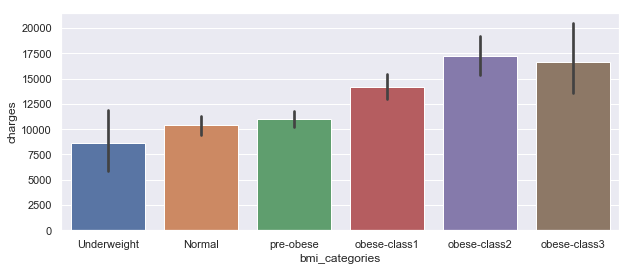

In [122]:
plt.figure(figsize=(10,4))
bmi_data = categorize_bmi(insurance)
sns.barplot(x="bmi_categories" , y ="charges" , data =bmi_data) # visualize gender with charges
plt.show()

With Normally distributed BMI data  , the people in the obese-class2 and obese-class3 are spending more on medical expenses.

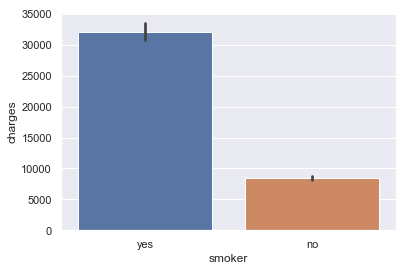

In [123]:
sns.barplot(x="smoker" , y ="charges" , data =insurance) # visualize smoker with charges
plt.show()

It is visible that the smokers are have more charges . Nearly 80 percent more.
Very clear that smoking is injurious to health.

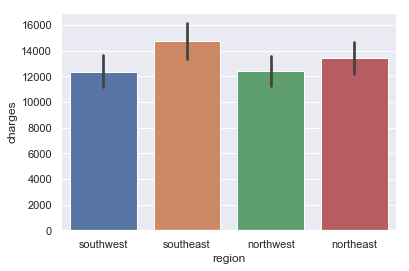

In [124]:
sns.barplot(x="region" , y ="charges" , data =insurance) # visualize region with charges
plt.show()

Not much visible diffenrence between regions , though southeast regon is the leading one.

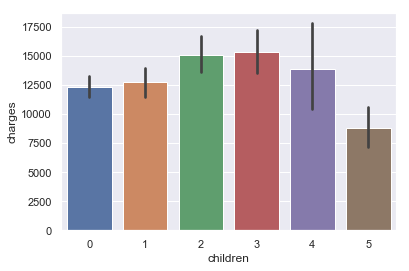

In [125]:
sns.barplot(x="children" , y ="charges" , data =insurance) # visualize children with charges
plt.show()

Not much difference in charges with respect to the number of children in the insurance policy.

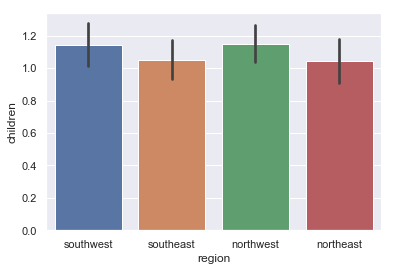

In [130]:
sns.barplot(y="children" , x ="region" , data =insurance) # visualize children with region
plt.show()

Not much relation can be found in the number of children between regions

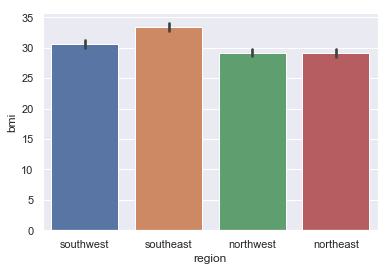

In [131]:
sns.barplot(y="bmi" , x ="region" , data =insurance) # visualize children with region
plt.show()

Not much relation can be found in the BMI rate between regions

# MultiVariate Analysis

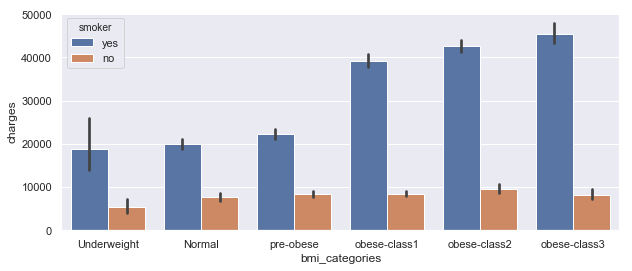

In [133]:
plt.figure(figsize=(10,4))
sns.barplot(x="bmi_categories" , y ="charges",hue= "smoker", data =bmi_data) # visualize gender with charges
plt.show()

we can clearly see that smokers who are obese have higher charges

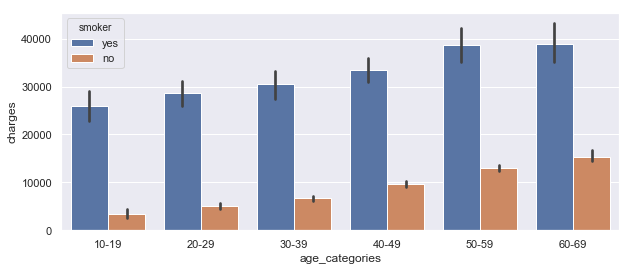

In [135]:
plt.figure(figsize=(10,4))
sns.barplot(x="age_categories" , y ="charges",hue= "smoker", data =bmi_data) # visualize gender with charges
plt.show()

we can clearly see that smokers who are older have higher charges

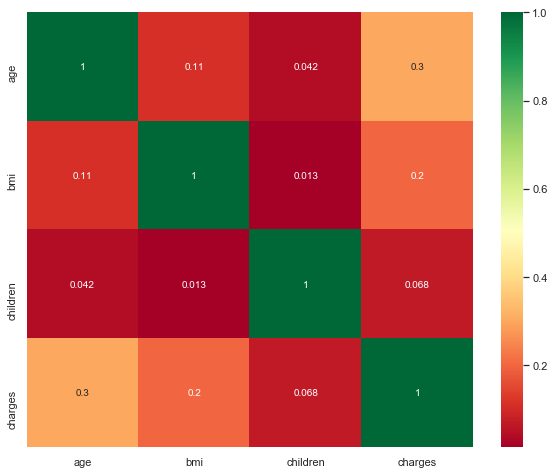

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(insurance.corr(),annot=True,cmap ='RdYlGn')
plt.show()

Only age and charges have higher correlation , next comes bmi and charges

# Hypothesis testing

# Question1 : Do charges of people who smoke differ significantly from the people who don't?

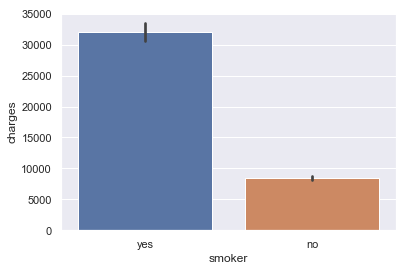

In [16]:
#visualise the data
sns.barplot(insurance['smoker'],insurance['charges']) # compare with barplot the charges
plt.show()

Visually, we can see that the charges of who smoke is different from those who dont smoke.

we need to check if this is just a statistical fluctuation or a significant difference.
we can prove this using hypothesis testing.

In [17]:
Ho = "There is no difference between the charges of non-smoker and the charges of smoker" #null-hypothesis
Ha = "There is difference betweent the charges of non-smoker and the charges of smoker" #Alternative- hypothesis

Points to chose the correct method of Hypothesis testing :

    We can prove the alternate hypothesis by comparing the mean of both the samples(smoker/non-smoker).
    Here we dont know the population mean / standard deviation . 
    These samples are independent of each other.
    
Selected Testing method : Two-tailed-independent-T-test

Precondition : Samples must be normally distributed

In [18]:
#create the two samples
insurance_smoker = insurance[insurance['smoker'] == 'yes']['charges'] #filter smoker charges
insurance_non_smoker = insurance[insurance['smoker'] == 'no']['charges'] #filter non-smoker charges

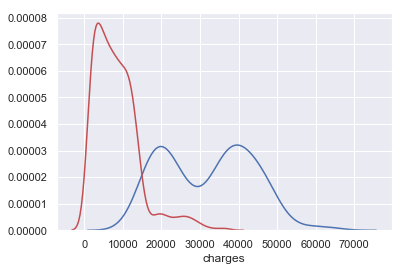

In [19]:
#check the distribution of the charges data
sns.distplot(insurance_smoker, hist = False)
sns.distplot(insurance_non_smoker, hist = False , color = "r")
plt.show()

we can see that the samples are not normally distributed . Let us test this using saphiro_test

In [20]:
#saphiro test to test the normality of the sample data
def saphiro_test(data) :
    alpha = 0.05 
    stat, p = shapiro(data) #scipy stats shapiro method
    print('Statistics=%.3f, p=%10.3E' % (stat, p)) #print the stats
    
    if p > alpha:
        print('Sample looks Normally Distributed (fail to reject H0)')
    else:
        print('Sample does not look Normally distributed (reject H0)')

In [21]:
#check the distribution using Saphiro test
saphiro_test(insurance_smoker)

Statistics=0.940, p= 3.625E-09
Sample does not look Normally distributed (reject H0)


In [22]:
#check the distribution using Saphiro test
saphiro_test(insurance_non_smoker)

Statistics=0.873, p= 1.446E-28
Sample does not look Normally distributed (reject H0)


From Saphiro test results ,Both the samples are not normally distributed .

Let us transfrom the data using logarathim to get a normally distributed data.

In [23]:
smoker_charges_transformed = stats.boxcox(exp(insurance_smoker),0)# logrithmic transformation of charges of smoker data
non_smoker_charges_transformed = stats.boxcox(exp(insurance_non_smoker),0) # logrithmic transformation of charges of non-smoker data


Now let us test the normality using Saphiro test

In [24]:
#check the distribution using Saphiro test
saphiro_test(smoker_charges_transformed)

Statistics=nan, p= 1.000E+00
Sample looks Normally Distributed (fail to reject H0)


In [25]:
#check the distribution using Saphiro test
saphiro_test(non_smoker_charges_transformed)

Statistics=nan, p= 1.000E+00
Sample looks Normally Distributed (fail to reject H0)


Now the samples are normally distributed, we can go for  Two-tailed-independent-T-test

In [52]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate sample standard deviations
    std1, std2 = std(data1, ddof=1), std(data2, ddof=1)
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/sqrt(n1), std2/sqrt(n2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [53]:
alpha = 0.05 # set significance value
t_stat, df, cv, p=independent_ttest(insurance_smoker , insurance_non_smoker ,alpha)
if p > alpha:
    print('There is no difference between the charges of non-smoker and the charges of smoker(fail to reject H0)')
else:
    print('There is difference between the charges of non-smoker and the charges of smoker (reject H0)')

There is difference between the charges of non-smoker and the charges of smoker (reject H0)


Hence Proved.

# Question 2 : Does bmi of males differ significantly from that of females?

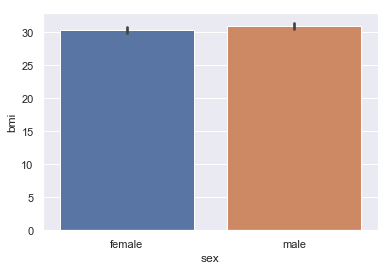

In [54]:
#visualise the data
sns.barplot(insurance['sex'],insurance['bmi']) # compare with barplot the bmi
plt.show()

Visually, we cannot see differences between the BMI of male and female.

we need to check if this is just a statistical fluctuation or a significant difference. we can prove this using hypothesis testing.

In [ ]:
Ho = "There is no difference between the bmi of male and female samples" #null-hypothesis
Ha = "There is difference betweent the bmi of male and female samples" #Alternative- hypothesis

Points to chose the correct method of Hypothesis testing :

    We can prove the alternate hypothesis by comparing the mean of both the samples(male/female).
    Here we dont know the population mean / standard deviation . 
    These samples are independent of each other.
    
Selected Testing method : Two-tailed-independent-T-test

Precondition : Samples must be normally distributed

In [56]:
#create the two samples
insurance_male = insurance[insurance['sex'] == 'male']['bmi'] #filter male bmi
insurance_female = insurance[insurance['sex'] == 'female']['bmi'] #filter female bmi

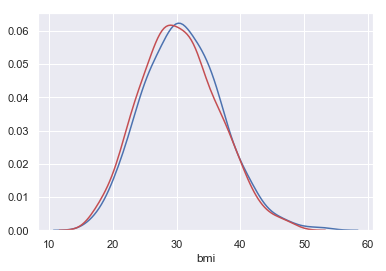

In [57]:
#check the distribution of the charges data
sns.distplot(insurance_male, hist = False)
sns.distplot(insurance_female, hist = False , color = "r")
plt.show()

we can see that the samples are normally distributed (with the beautiful bell curve).

In [64]:
t_stat, df, cv, p=independent_ttest(insurance_male , insurance_female ,alpha) #hypothesis testing
print('Statistics=%.3f, p=%10.3E' % (t_stat, p)) #print the stats
if p > alpha:
    print('There is no difference between the bmi of male and female samples(fail to reject H0)')
else:
    print('There is difference between the bmi of male and female samples (reject H0)')

Statistics=1.697, p= 8.992E-02
There is no difference between the bmi of male and female samples(fail to reject H0)


# Question 3 : Is the proportion of smokers significantly different in different genders?

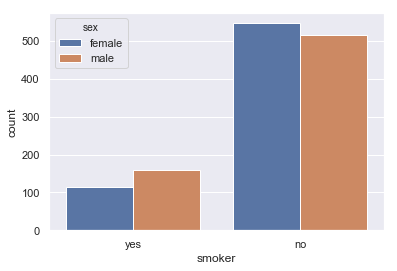

In [69]:
#visualise the data
sns.countplot(insurance['smoker'], hue = insurance['sex'])

Visually, we can see that the men smoke more than women

we need to check if this is just a statistical fluctuation or a significant difference. we can prove this using hypothesis testing.

In [71]:
Ho = "There is no difference in the proportion of smoker between male and female" #null-hypothesis
Ha = "There is difference in the proportion of smoker between male and female" #Alternative- hypothesis

Points to chose the correct method of Hypothesis testing :
    
    Comparision of categorical variables
    Two sample sets independent of each other
    
Selected hypothesis testing method : chi-square test

Steps :
    create contigency table
    expected value is calculated
    X^2 =(observed - expected)^2 / expected
    check the chi-squared table for alpha= 0.05(95% confidence) and degree of freedom = 1(chi-square-critical = 3.84) 
    if chi-square-critical > chi-square-stat
        we cannot reject H0
    if chi-square-critical < chi-square-stat
        reject H0

In [81]:
contingency_table = pd.crosstab(insurance['smoker'],insurance['sex'],margins = True) # create contigency tble
contingency_table

sex,female,male,All
smoker,,,
no,547,517,1064
yes,115,159,274
All,662,676,1338


In [92]:
f_obs = np.append(contingency_table.iloc[0][0:2].values, contingency_table.iloc[1][0:2].values)

In [99]:
f_expected = []
for i in np.arange(2):
    for j in np.arange(2):
        f_expected.append((contingency_table.iloc[i][2] * contingency_table.iloc[2][j])/contingency_table['All']['All'])
f_expected

[526.4334828101644, 537.5665171898356, 135.56651718983557, 138.43348281016443]

In [94]:
chi_squared_statistic = ((f_obs - f_expected)**2/f_expected).sum()
print('Chi-squared Statistic: {}'.format(chi_squared_statistic))

Chi-squared Statistic: 7.765921028604452


In [95]:
#DoF=(Number of rows−1)∗(Number of columns−1)
DoF = (2-1)*(2-1)

Looking into the table for alpha= 0.05(95% confidence) and degree of freedom = 1 , chi-square-critical = 3.84

Our value is higher than the chi-square-critical , we can reject the null hypothesis.

Hence the conclusion : There is difference in the proportion of smoker between male and female

In [98]:
# cross checking with scipy
chi,p,dof,expected =stats.chi2_contingency(pd.crosstab(insurance['smoker'],insurance['sex'])) 

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

# Question 3 : Is the distribution of bmi across women with no children, one child and two children,the same ?

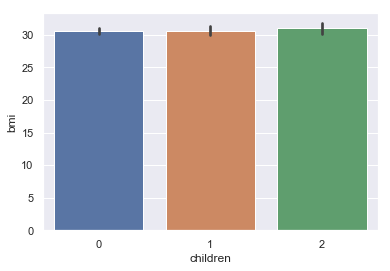

In [141]:
# visualize children with bmi
sns.barplot(x="children" , y ="bmi" , data =insurance[insurance['children'] <3]) 
plt.show()

Visually we donot find the difference in the distribution.

With the help of hypothesis testing , we can find if this is stastistical fluctuation , or really there are no difference.

In [ ]:
Ho = "Number of children have no effect on BMI" #null-hypothesis
Ha = "Number of children have effect on BMI" #Alternative- hypothesis

Points to chose the correct method of Hypothesis testing :

    More than two samples have to be tested of a single independent variable.
    
Tested selected : one - way ANOVA

Precondition : the sample should be normally distributed.

steps : Annova calculates the variance between the sample / variance within the sample

In [145]:
children_zero = insurance[insurance['children'] == 0]['bmi'] #filter 
children_one = insurance[insurance['children'] == 1]['bmi']
children_two = insurance[insurance['children'] == 2]['bmi']

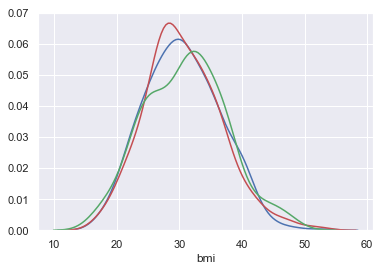

In [146]:
#check the distribution of the bmi data
sns.distplot(children_zero, hist = False)
sns.distplot(children_one, hist = False , color = "r")
sns.distplot(children_two, hist = False , color = "g")
plt.show()

visually it looks normally distributed.

In [148]:
f_stat, p = stats.f_oneway(children_zero,children_one,children_two) #one -way annova

In [149]:
print('Statistics=%.3f, p=%10.3E' % (f_stat, p)) #print the stats

if p > alpha:
    print('Number of children have no effect on BMI(fail to reject H0)')
else:
    print('Number of children have effect on BMI (reject H0)')

Statistics=0.417, p= 6.591E-01
Number of children have no effect on BMI(fail to reject H0)


# Summary

# Title: Elder or Obese people with smoking habits have higher Medical charges

Observations :
    
    Indeed, Smoking is injurious to health . People with smoking habits have higher medical expenses than non -smokers(nearly 80 percent higher)
    
    People with high BMI especially with class2 and class3 obesity have more medical charges
    
    Elder people above age 50 have higher charges.
    
    Region , Number of children does not have effect on charges.
    
    Men are found to be more smoking than women.
    
    
    
    